# scCODA: differential abundance analysis Kids vs Young adults (CD4 T)

## Introduction

The aim of this notebook is to perform a differential abundance analysis between kids and young adults for CD4 T cells of our tonsil atlas using [scCODA](https://www.nature.com/articles/s41467-021-27150-6). Previously, we subsetted to only those donors that were profiled with 3' scRNA-seq, had tonsillitis, and samples were processed fresh.

## Pre-processing

### Load packages

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle as pkl
from sccoda.util import comp_ana as mod
from sccoda.util import cell_composition_data as dat
from sccoda.util import data_visualization as viz


### Data preparation

In [7]:
path_data = "~/Desktop/CNAG/mnt_clust/tonsil_atlas/current/scRNA-seq/results/tables/scCODA_input_CD4_T_kid_vs_young_adult.csv"
counts_df = pd.read_csv(path_data)
print(counts_df)

    donor_id    age_group  Naive  CM Pre-non-Tfh  CM PreTfh  Tfh T:B border  \
0  BCLL-10-T          kid   1165             105         67              52   
1  BCLL-11-T          kid    264              76         13              12   
2  BCLL-12-T          kid    359              97         38              11   
3  BCLL-13-T          kid    649             157        150              63   
4  BCLL-20-T  young_adult   1447             183         20               0   
5  BCLL-21-T  young_adult   2169             322        335               1   
6  BCLL-22-T  young_adult   2611             347         66               0   
7  BCLL-28-T  young_adult    443             148         57               0   
8   BCLL-8-T          kid    938             155         24              19   
9   BCLL-9-T          kid    376              79          7               3   

   Tfh-LZ-GC  GC-Tfh-SAP  GC-Tfh-OX40  Tfh-Mem  T-Trans-Mem  T-Eff-Mem  \
0       1663        1404          287      266          

<Axes: xlabel='Cell type', ylabel='Proportion'>

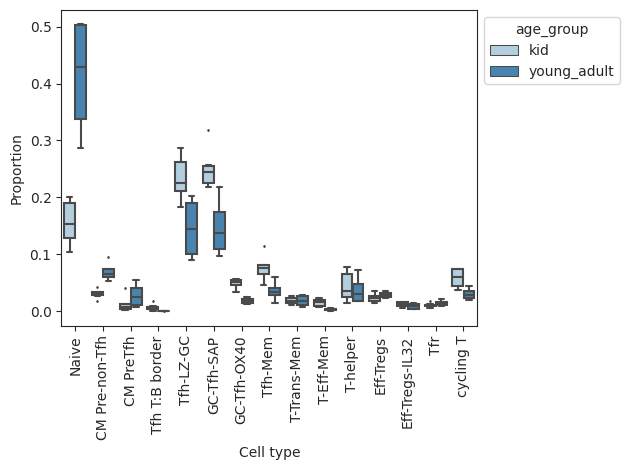

In [16]:
# Convert data to anndata object
data_all = dat.from_pandas(counts_df, covariate_columns = ["donor_id", "age_group"])
viz.boxplots(data_all, feature_name = "age_group")

# Model setup and inference

In [17]:
model_cd4 = mod.CompositionalAnalysis(data_all, formula = "age_group", reference_cell_type = "T-helper")

Zero counts encountered in data! Added a pseudocount of 0.5.


In [20]:
sim_results = model_cd4.sample_hmc()

2023-06-13 11:16:13.241356: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INTERNAL: No function library is provided.
	 [[{{node Independentpredictions/sample/predictions/sample/PartitionedCall}}]]
2023-06-13 11:16:13.474943: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INTERNAL: No function library is provided.
	 [[{{node Independentpredictions/sample/predictions/sample/PartitionedCall}}]]
100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20000/20000 [01:31<00:00, 218.75it/s]


MCMC sampling finished. (114.502 sec)
Acceptance rate: 62.5%


# Result interpretation

In [23]:
sim_results.set_fdr(est_fdr = 0.1)
sim_results.summary()

Compositional Analysis summary:

Data: 10 samples, 15 cell types
Reference index: 10
Formula: age_group

Intercepts:
                Final Parameter  Expected Sample
Cell Type                                       
Naive                     2.971       601.992655
CM Pre-non-Tfh            1.478       135.266275
CM PreTfh                 0.536        52.733200
Tfh T:B border           -0.327        22.247847
Tfh-LZ-GC                 3.349       878.525773
GC-Tfh-SAP                3.429       951.695608
GC-Tfh-OX40               1.782       183.322197
Tfh-Mem                   2.200       278.451875
T-Trans-Mem               0.972        81.552358
T-Eff-Mem                 0.557        53.852307
T-helper                  1.589       151.145847
Eff-Tregs                 1.245       107.151663
Eff-Tregs-IL32            0.552        53.583718
Tfr                       0.640        58.512783
cycling T                 1.926       211.715892


Effects:
                                       

In [24]:
sim_results.credible_effects()

Covariate                 Cell Type     
age_group[T.young_adult]  Naive              True
                          CM Pre-non-Tfh     True
                          CM PreTfh         False
                          Tfh T:B border    False
                          Tfh-LZ-GC         False
                          GC-Tfh-SAP         True
                          GC-Tfh-OX40        True
                          Tfh-Mem            True
                          T-Trans-Mem       False
                          T-Eff-Mem         False
                          T-helper          False
                          Eff-Tregs         False
                          Eff-Tregs-IL32    False
                          Tfr               False
                          cycling T         False
Name: Final Parameter, dtype: bool

# Save results

In [36]:
path_save = "/home/rmassonix/Desktop/CNAG/mnt_clust/tonsil_atlas/current/scRNA-seq/results/scCODA_results_CD4.p"
sim_results.save(path_save)